In [1]:
from pylab import *
import numpy as np
import copy
from numpy.fft import ifft2
from copy import deepcopy

/Users/heyfaraday/anaconda/envs/new2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
x,y,z = genfromtxt('f2.dat').T
N = int(sqrt(x.shape[0]))
x = x.reshape(N, N)
y = y.reshape(N, N)
z = z.reshape(N, N)
a1 = deepcopy(z)
a2 = deepcopy(z)

In [319]:
mu, sigma = 0.0, 1.0 
for i in xrange(0, 254):
    for j in xrange(0, 254):
        i_f = float(i-127)
        j_f = float(j)
        a1[int(i)][int(j)] = (np.random.normal(mu, sigma))
        if (i_f > 4) | (i_f < -4):
            a1[i][j] = 0
        if (j_f < 0) | (j_f > 4):
            a1[i][j] = 0 
        if (i_f**2 + j_f**2 > 16):
            a1[i][j] = 0
        #if (j > 127):
        #    a1[i][j] = 0
        if (j_f == 0) & (i_f == 0):
            a1[i][j] = 0
a1 = a1.T

In [320]:
print a1[0][122:133]
print a1[1][122:133]
print a1[2][122:133]
print a1[3][122:133]

[ 0.         -1.18104121  1.5223584   0.7581898  -1.48783651  0.
  0.04602858  0.44347367 -0.15708911  0.81286795  0.        ]
[ 0.          0.         -1.9021776   0.89778372 -0.20404452  0.33667361
 -1.59378493  0.56583847 -1.22313057  0.          0.        ]
[ 0.          0.         -0.69822842 -1.90187972 -0.16456975 -0.09475105
 -1.44779295 -0.19754585  1.602351    0.          0.        ]
[ 0.          0.          0.         -0.02426217  1.1775952   1.2263819
 -0.46856577  0.06999932  0.          0.          0.        ]


In [321]:
mu, sigma = 0.0, 1.0 
for i in xrange(0, 254):
    for j in xrange(0, 254):
        i_f = float(i-127)
        j_f = float(j)
        a2[i][j] = (-(fabs(i_f)*fabs(i_f) - fabs(j_f)*fabs(j_f))*np.random.normal(mu, sigma))
        if (i_f > 2) | (i_f < -2):
            a2[i][j] = 0
        if (j_f < 0) | (j_f > 2):
            a2[i][j] = 0 
        if (j > 127):
            a2[i][j] = 0

In [322]:
b2 = np.real(irfft2((a2[:128]).T)) 
b1 = np.real(irfft2((a1[:128]).T))

In [323]:
for i in xrange(0, 254):
    for j in xrange(0, 254):
        if (i % 2 == 1):
            b1[i][j] = -b1[i][j]
        if (j % 2 == 1):
            b2[i][j] = -b2[i][j]

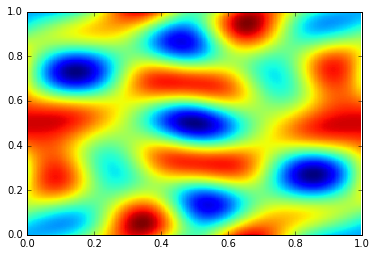

In [324]:
pcolormesh(x,y, b1)
show()

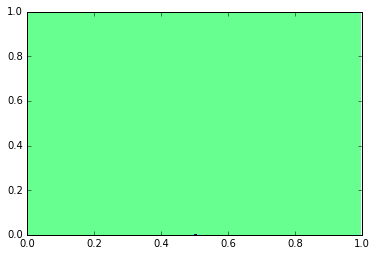

In [191]:
pcolormesh(x, y, a1)
show()

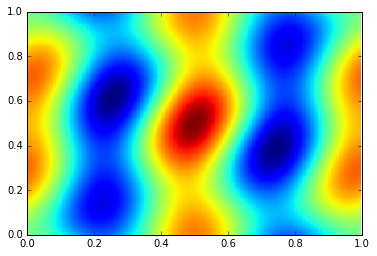

In [132]:
pcolormesh(x,y, b2)
show()

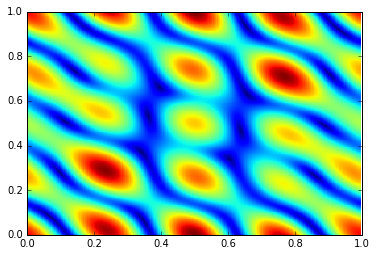

In [9]:
pcolormesh(x,y,np.sqrt(fabs(b1)*fabs(b1) + fabs(b2)*fabs(b2)))
show()